<a href="https://colab.research.google.com/github/jen0707/AIModeling/blob/Classification/LogisticRegression(sklearn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np

In [23]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [10]:
x = mnist.data
y = mnist.target.astype(int)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [14]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [15]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9130


In [16]:
y_proba = model.predict_proba(x_test)
ce_loss = log_loss(y_test, y_proba)
print(f"Cross Entropy Loss : {ce_loss:.4f}")

Cross Entropy Loss : 0.3505


Confusion Matrix:


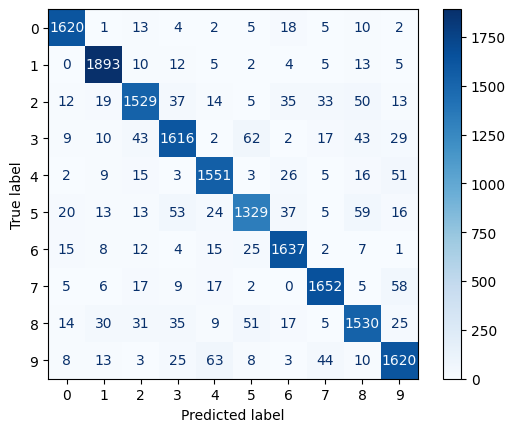

In [24]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot(cmap='Blues')
plt.show()

In [25]:
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score (macro): {f1_macro:.4f}")
f1_score = f1_score(y_test, y_pred, average = 'weighted')
print(f"F1 Score (weighted): {f1_score:.4f}")

F1 Score (macro): 0.9120
F1 Score (weighted): 0.9127
